## Формализация задачи

Пусть у нас есть следующие множеста U,I,S,R.
- U - множество пользователей $u_k \in U$
- I - множество товаро $i_k \in I$
- S - множество последовательностей взаимодействий пользователей $s_k \in S$ упорядоченных по времени, где $s_k = \{i_1,i_2, ... i_n\}$ для пользователя  $u_k$.
- R - множество оценок релеватности, где $r_{kj} \in R$ оценка релевантности товара i_j  для пользователя u_k.

Тогда задачу можно формализовать следующим образов:

Для пользователя $u_k$ c историй взаимодействий $s_k$ предсказать следующий наиболее релевантный товар $i_k$.     

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install fastparquet pyarrow

In [3]:
import pandas as pd

# pd.show_versions()
df_text = pd.read_parquet("/content/drive/MyDrive/WB/text_data_69020_final.parquet", engine = "fastparquet")
df_click = pd.read_parquet("/content/drive/MyDrive/WB/train_data_10_10_24_10_11_24_final.parquet", engine = "fastparquet")

In [4]:
df_text

,title,brandname,nm_id,colornames,characteristics,description
0,Платье женское трапеция из кожи а-силуэт,YULITA collection,33500,['черный'],None,Данная модель - отличный вариант для нескучных...
1,Платье теплое вязаное трикотажное повседневное,ANNA ANNA Fashion laboratory,100723,"['лимонный', 'желтый']",None,Теплое женское платье свитер с длинным рукавом...
2,Платье,TRUFFLE_SHOPPING,68003,['белый'],None,"Воздушные, нежные.... Притягивающие взор и вни..."
3,Платье мини,Mollis,115588,"['черный', 'серебристый']",None,Вечернее платье мини с цепочкой из блестящего ...
4,нарядное розовое платье больших размеров,Grisol,69955,['пастельно сиреневый'],None,Красивое нарядное торжественное платье нежно-р...
...,...,...,...,...,...,...
419761,Платье вечернее праздничное мини,ADAMARIS,26115,[белый],None,Это платье с буфами идеально подходит на свадь...
419762,Платье с декольте гипюровое кружевное стрейч м...,Kamukamu,267176,[черный],None,Роскошное кружевное женское платье прилегающег...
419763,Льняное платье вечернее,Sacra,59167,[черный],None,Эффектное льняное платье из дизайнерской колле...
419764,Платье вельветовое офисное,MERIGRAND,36971,[синий],None,Вельветовое платье больших размеров от бренда ...


In [5]:
df_text.dtypes

,0
title,object
brandname,object
nm_id,int64
colornames,object
characteristics,object
description,object


In [6]:
df_click

,wbuser_id,nm_id,subject_id,dt,date
0,2361989,399340,69020,2024-10-11 09:48:23,1728604800000000000
1,2219776,366252,69020,2024-10-10 19:44:54,1728518400000000000
2,190522,300447,69020,2024-10-10 20:13:01,1728518400000000000
3,2361990,300447,69020,2024-10-10 19:27:19,1728518400000000000
4,313,190945,69020,2024-10-11 23:17:59,1728604800000000000
...,...,...,...,...,...
58872071,4384971,352053,69020,2024-10-11 07:28:19,1728604800000000000
58872072,2139273,352053,69020,2024-10-10 21:44:46,1728518400000000000
58872073,1504233,352053,69020,2024-10-10 11:54:44,1728518400000000000
58872074,4110849,352053,69020,2024-10-10 08:36:59,1728518400000000000


In [7]:
df_click.dtypes

,0
wbuser_id,int64
nm_id,int64
subject_id,int64
dt,datetime64[ns]
date,object


## Первичный анализ df_text

- nm_id: все уникальны
- characteristics: все nan
- уникальных брендов: 31892
- description: 198331


In [8]:
df_text
print(f"all: {len(df_text)}")
for col in df_text.columns:
  if col == 'colornames':
    continue
  print(f"{col}\nuniq_vals: {df_text[col].nunique()}\nnan:{len(df_text[df_text[col].isna()])} || {100*len(df_text[df_text[col].isna()])/len(df_text)}%\n")

all: 419766
title
uniq_vals: 100595
nan:1889 || 0.45001262608215054%

brandname
uniq_vals: 31892
nan:6332 || 1.5084594750408562%

nm_id
uniq_vals: 419766
nan:0 || 0.0%

characteristics
uniq_vals: 0
nan:419766 || 100.0%

description
uniq_vals: 198331
nan:31303 || 7.457249991662021%



In [9]:
df_text.drop(columns='characteristics', inplace = True)

Топ крупных брендов

In [10]:
brand_size = df_text[~df_text['brandname'].isna()].groupby('brandname').size()
brand_size.nlargest(50)

,0
brandname,
Emberens,4480
Befree,2534
Vittoria Vicci,2368
A-A Awesome Apparel by Ksenia Avakyan,2319
LOVE REPUBLIC,2228
Lussotico,2053
ZARINA,2026
oodji,1924
Mango,1897


In [11]:
brand_size.describe()

,0
count,31892.000000
mean,12.963565
std,63.925278
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,4480.000000


In [12]:
df_text.loc[ ~df_text['description'].isna() ,'description'].apply(lambda x: len(x.split())).describe()

,description
count,388463.000000
mean,149.273532
std,83.588438
min,0.000000
25%,89.000000
50%,140.000000
75%,205.000000
max,820.000000


## Первичный анализ click

- только один subject_id
- только 2 даты
- нет nan

In [13]:
df_click

,wbuser_id,nm_id,subject_id,dt,date
0,2361989,399340,69020,2024-10-11 09:48:23,1728604800000000000
1,2219776,366252,69020,2024-10-10 19:44:54,1728518400000000000
2,190522,300447,69020,2024-10-10 20:13:01,1728518400000000000
3,2361990,300447,69020,2024-10-10 19:27:19,1728518400000000000
4,313,190945,69020,2024-10-11 23:17:59,1728604800000000000
...,...,...,...,...,...
58872071,4384971,352053,69020,2024-10-11 07:28:19,1728604800000000000
58872072,2139273,352053,69020,2024-10-10 21:44:46,1728518400000000000
58872073,1504233,352053,69020,2024-10-10 11:54:44,1728518400000000000
58872074,4110849,352053,69020,2024-10-10 08:36:59,1728518400000000000


In [14]:
print(f"all: {len(df_click)}")
for col in df_click.columns:
  print(f"{col}\nuniq_vals: {df_click[col].nunique()}\nnan:{len(df_click[df_click[col].isna()])} || {100*len(df_click[df_click[col].isna()])/len(df_click)}%\n")

all: 58872076
wbuser_id
uniq_vals: 3938265
nan:0 || 0.0%

nm_id
uniq_vals: 386501
nan:0 || 0.0%

subject_id
uniq_vals: 1
nan:0 || 0.0%

dt
uniq_vals: 169153
nan:0 || 0.0%

date
uniq_vals: 2
nan:0 || 0.0%



## Даты

In [15]:
print(f"min dt: {df_click['dt'].min()}")
print(f"max dt: {df_click['dt'].max()}")


min dt: 2024-10-10 00:00:01
max dt: 2024-10-11 23:59:59


In [16]:
df_click['dt'].describe()

,dt
count,58872076
mean,2024-10-11 01:39:55.472657664
min,2024-10-10 00:00:01
25%,2024-10-10 14:22:35
50%,2024-10-10 22:53:08
75%,2024-10-11 14:28:07
max,2024-10-11 23:59:59


In [17]:
df_click.sort_values(ascending=True, by = 'dt').groupby('wbuser_id')['dt'].diff().describe()

,dt
count,54933811
mean,0 days 00:28:39.860726575
std,0 days 02:50:49.340376912
min,0 days 00:00:00
25%,0 days 00:00:04
50%,0 days 00:00:10
75%,0 days 00:00:33
max,1 days 23:58:43


## Соберем клики по wbuser_id

In [18]:
df_click.groupby('wbuser_id').size()

,0
wbuser_id,
1,76
3,31
5,67
8,2
9,43
...,...
5168286,1
5168287,1
5168288,1


In [19]:
df_click.groupby('wbuser_id').size().describe()

,0
count,3.938265e+06
mean,1.494873e+01
std,3.316016e+01
min,1.000000e+00
25%,1.000000e+00
50%,4.000000e+00
75%,1.400000e+01
max,3.535000e+03


In [20]:
user_size = df_click.groupby('wbuser_id').size()
q_95 = user_size.quantile(q=0.95)
user_size[user_size < q_95].describe()

,0
count,3.738834e+06
mean,9.226192e+00
std,1.216680e+01
min,1.000000e+00
25%,1.000000e+00
50%,4.000000e+00
75%,1.200000e+01
max,6.200000e+01


In [21]:
user_size.nlargest(10)

,0
wbuser_id,
59849,3535
173444,2177
739147,1968
2376813,1934
40717,1786
14478,1733
1854,1629
1510732,1583
38651,1570


In [22]:
q_f = user_size.quantile(q=0.99)
print(q_f)
user_size[user_size > q_f]

153.0


,0
wbuser_id,
30,265
35,168
73,154
83,263
95,329
...,...
3112577,177
3165551,156
3165625,159


#### уровень уникальности nm-id в сессии пользователя

In [23]:
df_click.drop_duplicates(subset = ['nm_id', 'wbuser_id']).groupby('wbuser_id').size()/df_click.groupby('wbuser_id').size()

,0
wbuser_id,
1,0.868421
3,0.903226
5,0.925373
8,1.000000
9,0.837209
...,...
5168286,1.000000
5168287,1.000000
5168288,1.000000


In [24]:
(df_click.drop_duplicates(subset = ['nm_id', 'wbuser_id']).groupby('wbuser_id').size()/df_click.groupby('wbuser_id').size()).describe()

,0
count,3.938265e+06
mean,8.754242e-01
std,1.708041e-01
min,3.012048e-03
25%,7.835052e-01
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [25]:
uniq_nm_in_users = df_click.drop_duplicates(subset = ['nm_id', 'wbuser_id']).groupby('wbuser_id').size()/df_click.groupby('wbuser_id').size()


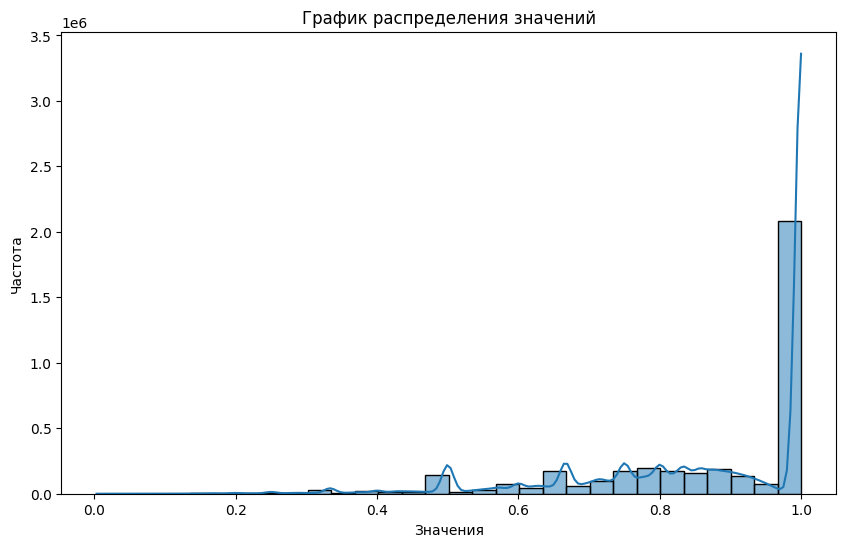

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создание DataFrame с рандомными данными
np.random.seed(42)
df = uniq_nm_in_users

# Построение графика распределения
plt.figure(figsize=(10, 6))
sns.histplot(df, kde=True, bins=30)
plt.title('График распределения значений')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()


Сессии довольно короткие (значение медианы 4), есть группа экстремально больших сессий

## Посмотрим nm_id

Просмотры у каждой nm_id

In [27]:
df_click.groupby('nm_id').size().describe()

,0
count,386501.00000
mean,152.32063
std,571.91857
min,1.00000
25%,2.00000
50%,13.00000
75%,81.00000
max,35387.00000


Пользователей у каждой nm_id

In [28]:
df_click.drop_duplicates(subset = ['nm_id', 'wbuser_id']).groupby('nm_id').size().describe()

,0
count,386501.000000
mean,119.245663
std,440.127063
min,1.000000
25%,2.000000
50%,11.000000
75%,65.000000
max,27186.000000


In [29]:
nm_id_size = df_click.groupby('nm_id').size()
nm_id_size.nlargest(50)

,0
nm_id,
87095,35387
181754,33665
49604,31866
408645,27891
387751,26254
401823,26110
73874,25959
332526,25507
243718,25021


### Как часто пользователи повторно встречают nm_id

In [30]:
1 - df_click.drop_duplicates(subset = ['nm_id', 'wbuser_id']).groupby('nm_id').size()/df_click.groupby('nm_id').size()

,0
nm_id,
0,0.215909
1,0.128205
2,0.238095
3,0.200000
4,0.161290
...,...
419763,0.171717
419764,0.000000
419765,0.042553


In [31]:
(1 - df_click.drop_duplicates(subset = ['nm_id', 'wbuser_id']).groupby('nm_id').size()/df_click.groupby('nm_id').size()).describe()

,0
count,386501.000000
mean,0.146369
std,0.150216
min,0.000000
25%,0.000000
50%,0.133333
75%,0.233766
max,0.973684


### Посмотрим покрытие: какое количество nm_id покрывает какое количество записей

In [32]:
nm_id_size = nm_id_size.sort_values(ascending = False)
cover_list = []
total = nm_id_size.sum()
act_num = 0
for down_b in range(0, len(nm_id_size), 100):
  act_num += nm_id_size.iloc[down_b:down_b+100].sum()
  cover_list.append([down_b+100,(down_b+100)/len(nm_id_size) , act_num/total, act_num, total])
cover_df = pd.DataFrame(data = cover_list, columns = ['top_k', 'nm_id%' ,'cov_%', 'cov_abs', 'total'])

In [33]:
cover_df

,top_k,nm_id%,cov_%,cov_abs,total
0,100,0.000259,0.027403,1613279,58872076
1,200,0.000517,0.045166,2659010,58872076
2,300,0.000776,0.060041,3534765,58872076
3,400,0.001035,0.073000,4297677,58872076
4,500,0.001294,0.084685,4985608,58872076
...,...,...,...,...,...
3861,386200,0.999221,0.999995,58871775,58872076
3862,386300,0.999480,0.999997,58871875,58872076
3863,386400,0.999739,0.999998,58871975,58872076
3864,386500,0.999997,1.000000,58872075,58872076


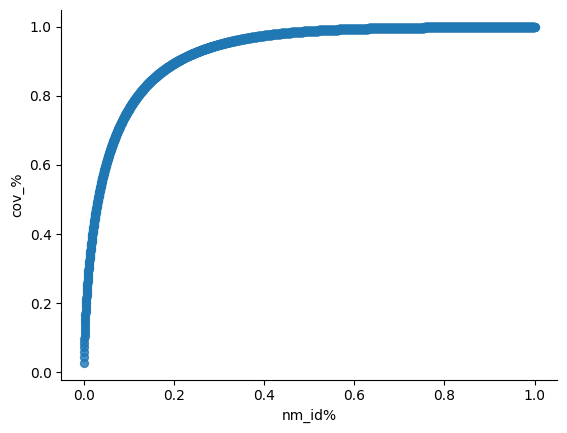

In [34]:
from matplotlib import pyplot as plt
cover_df.plot(kind='scatter', x='nm_id%', y='cov_%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
cover_df[cover_df['cov_%']>0.95]

,top_k,nm_id%,cov_%,cov_abs,total
1173,117400,0.303751,0.950062,55932136,58872076
1174,117500,0.304010,0.950154,55937536,58872076
1175,117600,0.304268,0.950246,55942936,58872076
1176,117700,0.304527,0.950337,55948336,58872076
1177,117800,0.304786,0.950429,55953736,58872076
...,...,...,...,...,...
3861,386200,0.999221,0.999995,58871775,58872076
3862,386300,0.999480,0.999997,58871875,58872076
3863,386400,0.999739,0.999998,58871975,58872076
3864,386500,0.999997,1.000000,58872075,58872076


In [36]:
cover_df[cover_df['cov_%']>0.99]

,top_k,nm_id%,cov_%,cov_abs,total
2051,205200,0.530917,0.990011,58284001,58872076
2052,205300,0.531176,0.990030,58285101,58872076
2053,205400,0.531435,0.990048,58286201,58872076
2054,205500,0.531693,0.990067,58287301,58872076
2055,205600,0.531952,0.990086,58288401,58872076
...,...,...,...,...,...
3861,386200,0.999221,0.999995,58871775,58872076
3862,386300,0.999480,0.999997,58871875,58872076
3863,386400,0.999739,0.999998,58871975,58872076
3864,386500,0.999997,1.000000,58872075,58872076


## Проверка на наличие товаров без встречаемости

Идея: найти nm_id у которых только один wbuser_id и посмотреть есть ли у него другие товары

In [37]:
df_click

,wbuser_id,nm_id,subject_id,dt,date
0,2361989,399340,69020,2024-10-11 09:48:23,1728604800000000000
1,2219776,366252,69020,2024-10-10 19:44:54,1728518400000000000
2,190522,300447,69020,2024-10-10 20:13:01,1728518400000000000
3,2361990,300447,69020,2024-10-10 19:27:19,1728518400000000000
4,313,190945,69020,2024-10-11 23:17:59,1728604800000000000
...,...,...,...,...,...
58872071,4384971,352053,69020,2024-10-11 07:28:19,1728604800000000000
58872072,2139273,352053,69020,2024-10-10 21:44:46,1728518400000000000
58872073,1504233,352053,69020,2024-10-10 11:54:44,1728518400000000000
58872074,4110849,352053,69020,2024-10-10 08:36:59,1728518400000000000


In [38]:
user_size = df_click.groupby('wbuser_id').size()
nm_size = df_click.groupby('nm_id').size()

In [39]:
cold_nm = nm_size[nm_size == 1].index
cold_nm

Index([     7,      8,     10,     12,     16,     20,     25,     30,     34,
           48,
       ...
       419720, 419734, 419735, 419742, 419747, 419748, 419749, 419750, 419759,
       419761],
      dtype='int64', name='nm_id', length=66675)

In [40]:
users_with_cold_nm = df_click.loc[df_click['nm_id'].isin(cold_nm), 'wbuser_id'].unique()
users_with_cold_nm

array([2362004, 1750614, 2362083, ...,   90122, 1338438, 4085995])

In [41]:
users_with_cold_nm_size = df_click[df_click['wbuser_id'].isin(users_with_cold_nm)].groupby('wbuser_id').size()

Проверить может ли быть n кликов из n только по 1 товару  

In [42]:
users_with_cold_nm_size

,0
wbuser_id,
33,64
98,59
126,149
144,30
152,81
...,...
5167748,1
5167756,1
5168073,1


In [43]:
users_with_cold_nm_size[users_with_cold_nm_size == 1]

,0
wbuser_id,
730,1
3659,1
8452,1
14386,1
14906,1
...,...
5167748,1
5167756,1
5168073,1


### Товары без взаимной встречаемости

In [44]:
no_meet_users = users_with_cold_nm_size[users_with_cold_nm_size == 1]
no_meet_nm_id = df_click.loc[df_click['wbuser_id'].isin(no_meet_users.index), 'nm_id']
no_meet_nm_id.drop_duplicates()

,nm_id
2704,48423
2897,201992
6540,333598
9071,146991
13129,103513
...,...
58832260,374138
58832853,67004
58854710,319498
58861435,297231


## Есть ли nm_id которых нет в df_text

Да: [290074, 210699]

In [45]:
df_text

,title,brandname,nm_id,colornames,description
0,Платье женское трапеция из кожи а-силуэт,YULITA collection,33500,['черный'],Данная модель - отличный вариант для нескучных...
1,Платье теплое вязаное трикотажное повседневное,ANNA ANNA Fashion laboratory,100723,"['лимонный', 'желтый']",Теплое женское платье свитер с длинным рукавом...
2,Платье,TRUFFLE_SHOPPING,68003,['белый'],"Воздушные, нежные.... Притягивающие взор и вни..."
3,Платье мини,Mollis,115588,"['черный', 'серебристый']",Вечернее платье мини с цепочкой из блестящего ...
4,нарядное розовое платье больших размеров,Grisol,69955,['пастельно сиреневый'],Красивое нарядное торжественное платье нежно-р...
...,...,...,...,...,...
419761,Платье вечернее праздничное мини,ADAMARIS,26115,[белый],Это платье с буфами идеально подходит на свадь...
419762,Платье с декольте гипюровое кружевное стрейч м...,Kamukamu,267176,[черный],Роскошное кружевное женское платье прилегающег...
419763,Льняное платье вечернее,Sacra,59167,[черный],Эффектное льняное платье из дизайнерской колле...
419764,Платье вельветовое офисное,MERIGRAND,36971,[синий],Вельветовое платье больших размеров от бренда ...


In [46]:
len(df_text[df_text['nm_id'].isin(nm_size.index)])

386499

In [47]:
len(df_click[df_click['nm_id'].isin(df_text['nm_id'])])

58872063

In [48]:
len(df_click)

58872076

In [49]:
df_click[~df_click['nm_id'].isin(df_text['nm_id'])]

,wbuser_id,nm_id,subject_id,dt,date
43754197,3832828,290074,69020,2024-10-11 20:01:30,1728604800000000000
47223897,3358177,210699,69020,2024-10-10 09:12:50,1728518400000000000
47232417,4058903,210699,69020,2024-10-11 16:50:21,1728604800000000000
47237395,4058903,210699,69020,2024-10-11 16:50:14,1728604800000000000
47264733,3102159,210699,69020,2024-10-11 13:45:55,1728604800000000000
47287279,2302696,210699,69020,2024-10-11 10:39:17,1728604800000000000
47288126,2925689,210699,69020,2024-10-10 13:53:47,1728518400000000000
47303244,2748936,210699,69020,2024-10-10 23:05:43,1728518400000000000
47320338,396531,210699,69020,2024-10-11 18:29:34,1728604800000000000
47320339,3355106,210699,69020,2024-10-10 13:06:02,1728518400000000000


In [50]:
df_click.loc[~df_click['nm_id'].isin(df_text['nm_id']), 'nm_id'].unique()

array([290074, 210699])

## Топ популярных nm_id

In [51]:
df_text.loc[df_text['nm_id'].isin(nm_id_size.nlargest(10).index)]

,title,brandname,nm_id,colornames,description
9927,Платье вечернее праздничное,Abito Nero,73874,"[молочный, бежевый]",Наше вечернее платье футляр - идеальный выбор ...
235778,Платье-водолазка тёплая офисная,ТЫСЯЧА СТОЛИЦ,201841,[бежевый],Представляем вашему вниманию нашу тредновое пл...
331672,Платье пиджак на запах офисное повседневное пр...,Carolina shop,387751,[черный],Предлагаем универсальное вечернее классическое...
389817,Короткое Y2K платье лапша с завязками и драпир...,VISCONTE,87095,[черный],Обтягивающее женское платье skims из плотного ...
396313,Платье лапша повседневное,ТЫСЯЧА СТОЛИЦ QIANZHIDU,401823,[капучино],"ВНИМАНИЕ Платье поставляется без ремня, ремень..."
402553,Платье теплое оверсайз свитер вязаное с горлом,Sole,332526,[бежевый],Трендовое платье свитер - идеальный выбор для ...
406797,Платье теплое свитер вязаное 2024,OULAKI,243718,[бежевый],"Дорогие девушки, теплое вязаное платье имеет O..."
410890,Платье с длинным рукавом вельветовое оверсайз ...,FELICIA MICCOLI,49604,[изумрудный],Эксклюзивное женское вельветовое зимнее платье...
416191,Платье лапша вязаное длинное,MoodRise,408645,"[слоновая кость, молочный, бежевый, пыльный бе...",Трикотажное базовое платье миди c отложным вор...
416754,Платье повседневное осень трикотажное офисное,Далория,181754,[черный],Разбер это трикотажное платье чёрного цвета с ...


Наблюдение.

In [52]:
df_text[df_text["nm_id"]==33500]

,title,brandname,nm_id,colornames,description
0,Платье женское трапеция из кожи а-силуэт,YULITA collection,33500,['черный'],Данная модель - отличный вариант для нескучных...


In [53]:
df_click[df_click["nm_id"]==33500]

,wbuser_id,nm_id,subject_id,dt,date


In [55]:
df_text[df_text["nm_id"]==87095]

,title,brandname,nm_id,colornames,description
389817,Короткое Y2K платье лапша с завязками и драпир...,VISCONTE,87095,[черный],Обтягивающее женское платье skims из плотного ...


In [56]:
df_text[df_text['title']== 'Платье']

,title,brandname,nm_id,colornames,description
2,Платье,TRUFFLE_SHOPPING,68003,['белый'],"Воздушные, нежные.... Притягивающие взор и вни..."
34,Платье,oodji,366495,[голубой],None
67,Платье,oodji,158835,"[белый, черный]",None
68,Платье,oodji,115160,[голубой],None
69,Платье,oodji,191898,[желтый],Сдержанное платье свободного силуэта с широким...
...,...,...,...,...,...
419652,Платье,Tram,212595,"[фуксия, темная фуксия]",Роскошное платье пиджак для торжеств и меропри...
419668,Платье,MAOLIYA,201703,[черный],Это элегантное платье короткой длины не остав...
419712,Платье,DiSORELLE,179754,[черный],None
419716,Платье,SPARADA,234427,"[темно-синий, светло-бежевый]",None


Картинки

In [54]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/WB/images (1).zip", 'r')
zip_ref.extractall("/content/sample_data/images")
zip_ref.close()

KeyboardInterrupt: 

In [ ]:
cd /content/sample_data/images/images

In [ ]:
from PIL import Image
img = Image.open("/content/sample_data/images/images/388119.jpg")


In [ ]:
img

In [ ]:
img = Image.open("/content/sample_data/images/images/366495.jpg")
img

In [ ]:
img = Image.open("/content/sample_data/images/images/158835.jpg")
img